# Part A

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

statlog_landsat_satellite = fetch_ucirepo(id=146)

X = statlog_landsat_satellite.data.features
y = statlog_landsat_satellite.data.targets

print(statlog_landsat_satellite.metadata)

print(statlog_landsat_satellite.variables)

{'uci_id': 146, 'name': 'Statlog (Landsat Satellite)', 'repository_url': 'https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite', 'data_url': 'https://archive.ics.uci.edu/static/public/146/data.csv', 'abstract': 'Multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood', 'area': 'Climate and Environment', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6435, 'num_features': 36, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C55887', 'creators': ['Ashwin Srinivasan'], 'intro_paper': None, 'additional_info': {'summary': "The database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification as

## Filter Data


In [3]:
mask = y['class'] != 6
X_filtered = X[mask]
y_filtered = y[mask]

print("Shape of X_filtered:", X_filtered.shape)
print("Shape of y_filtered:", y_filtered.shape)
print("Unique classes in y_filtered:", y_filtered['class'].unique())

Shape of X_filtered: (6435, 36)
Shape of y_filtered: (6435, 1)
Unique classes in y_filtered: [3 4 5 7 2 1]


## Standardize Features


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_filtered)

print("Shape of X_scaled:", X_scaled.shape)
print("First 5 rows of X_scaled:\n", X_scaled[:5])

Shape of X_scaled: (6435, 36)
First 5 rows of X_scaled:
 [[ 1.66117667  1.37257438  1.24420769  0.60368225  1.09510109  0.81960762
   0.4134574  -0.18464764  1.12012971  0.83580558  0.18915768  0.0322351
   2.33136167  1.86112614  2.02133558  1.07525264  1.69572636  1.25872355
   1.12764868  0.12591828  1.12650333  0.88010462  0.30190413 -0.07701037
   2.41818194  1.8695074   2.09408038  1.12372895  1.41242657  1.65697914
   1.72951567  0.91281419  1.13968481  1.05811558  0.84304598  0.23590444]
 [ 1.07314953  0.8044039   0.40309659 -0.19012792  1.09510109  0.81960762
   0.17340161  0.02655171  0.82316364  0.83580558  0.18915768 -0.17851709
   1.66967659  1.24838424  1.12133043  0.12440702  1.10473454  0.86576682
   0.29014635 -0.08423127  1.12650333  0.70529932  0.30190413 -0.23433155
   1.38721317  1.65021844  1.73287881  0.91308961  1.11594657  1.04416493
   0.83147376  0.2301193   1.13968481  0.70747193  0.30393629 -0.18398149]
 [ 1.07314953  0.8044039   0.16277913  0.02155479  0.8

## Split Data



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4504, 36)
Shape of X_test: (1931, 36)
Shape of y_train: (4504, 1)
Shape of y_test: (1931, 1)


## Train Models



In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

knn_classifier = KNeighborsClassifier(n_neighbors=5)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
dummy_classifier = DummyClassifier(strategy='prior')
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
gaussian_nb_classifier = GaussianNB()
svm_classifier = SVC(probability=True, random_state=42)

models = {
    'K-Nearest Neighbors': knn_classifier,
    'Decision Tree': decision_tree_classifier,
    'Dummy Classifier': dummy_classifier,
    'Logistic Regression': logistic_regression_classifier,
    'Gaussian Naive Bayes': gaussian_nb_classifier,
    'Support Vector Machine': svm_classifier
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train.values.ravel())
    print(f"{name} trained.")

print("All models trained successfully.")

Training K-Nearest Neighbors...
K-Nearest Neighbors trained.
Training Decision Tree...
Decision Tree trained.
Training Dummy Classifier...
Dummy Classifier trained.
Training Logistic Regression...
Logistic Regression trained.
Training Gaussian Naive Bayes...
Gaussian Naive Bayes trained.
Training Support Vector Machine...
Support Vector Machine trained.
All models trained successfully.


## Evaluate Models


In [7]:
from sklearn.metrics import accuracy_score, f1_score

performance_metrics = {}

for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred, average='weighted')

    performance_metrics[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1
    }
    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

print("\nPerformance Metrics:")
for name, metrics in performance_metrics.items():
    print(f"{name}: {metrics}")

Evaluating K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9026, F1-Score: 0.9027
Evaluating Decision Tree...
Decision Tree - Accuracy: 0.8472, F1-Score: 0.8484
Evaluating Dummy Classifier...
Dummy Classifier - Accuracy: 0.2330, F1-Score: 0.0881
Evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.8467, F1-Score: 0.8388
Evaluating Gaussian Naive Bayes...
Gaussian Naive Bayes - Accuracy: 0.7913, F1-Score: 0.8005
Evaluating Support Vector Machine...
Support Vector Machine - Accuracy: 0.8861, F1-Score: 0.8847

Performance Metrics:
K-Nearest Neighbors: {'Accuracy': 0.9026411185914034, 'F1-Score': 0.9026996714060708}
Decision Tree: {'Accuracy': 0.8472294148109788, 'F1-Score': 0.84837079738477}
Dummy Classifier: {'Accuracy': 0.23303987571206627, 'F1-Score': 0.0880873112729356}
Logistic Regression: {'Accuracy': 0.8467115484205076, 'F1-Score': 0.8388249243863592}
Gaussian Naive Bayes: {'Accuracy': 0.7912998446400829, 'F1-Score': 0.8004716843432413}
Support Vector Machin

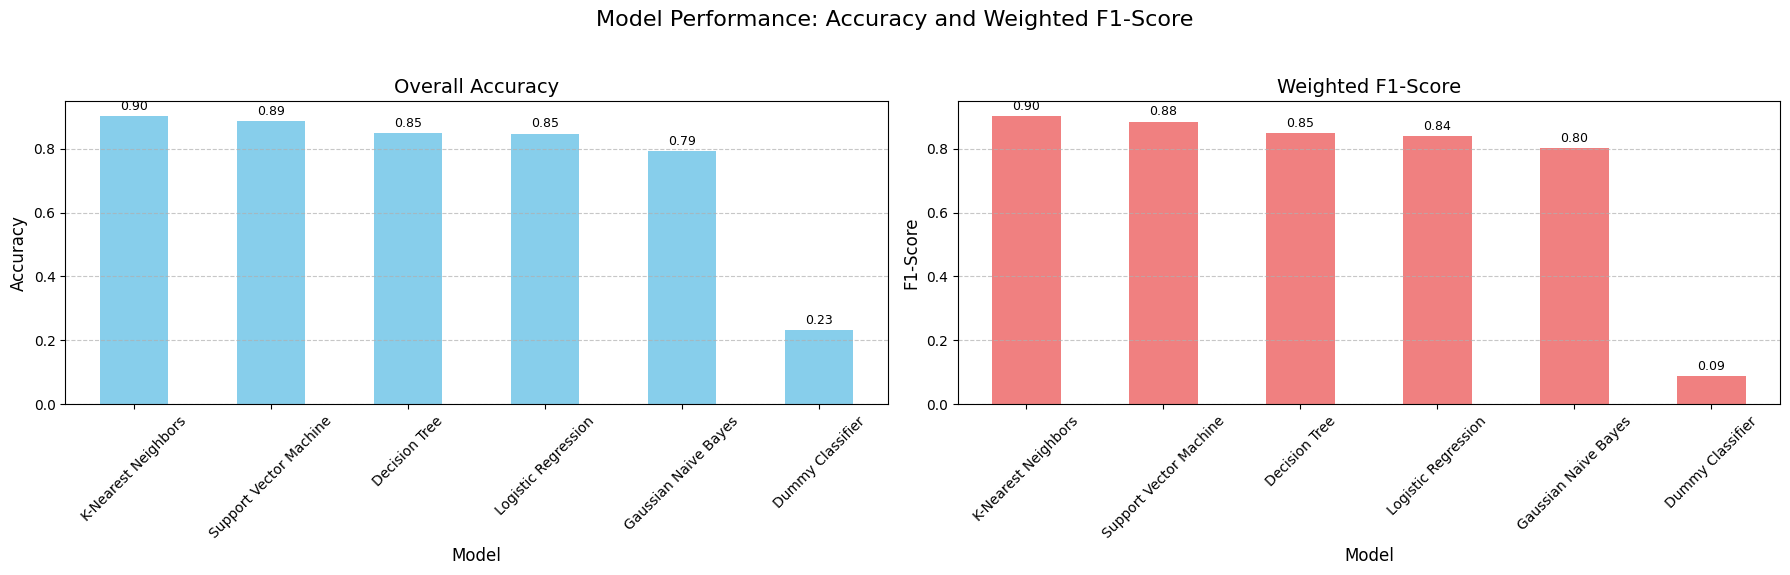

Overall Best performing model: K-Nearest Neighbors (F1-Score: 0.9027), (Accuracy: 0.9026411185914034
Overall Worst performing model: Dummy Classifier (F1-Score: 0.0881), (Accuracy: 0.23303987571206627


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

performance_df = pd.DataFrame(performance_metrics).T

performance_df_sorted_acc = performance_df.sort_values(by='Accuracy', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Model Performance: Accuracy and Weighted F1-Score', fontsize=16)

performance_df_sorted_acc['Accuracy'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Overall Accuracy', fontsize=14)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(performance_df_sorted_acc['Accuracy']):
    axes[0].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

performance_df_sorted_f1 = performance_df.sort_values(by='F1-Score', ascending=False)

performance_df_sorted_f1['F1-Score'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Weighted F1-Score', fontsize=14)
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(performance_df_sorted_f1['F1-Score']):
    axes[1].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

best_accuracy_model = performance_df['Accuracy'].idxmax()
worst_accuracy_model = performance_df['Accuracy'].idxmin()
best_f1_model = performance_df['F1-Score'].idxmax()
worst_f1_model = performance_df['F1-Score'].idxmin()

print(f"Overall Best performing model: {best_f1_model} (F1-Score: {performance_df['F1-Score'].max():.4f}), (Accuracy: {performance_df['Accuracy'].max()}")
print(f"Overall Worst performing model: {worst_f1_model} (F1-Score: {performance_df['F1-Score'].min():.4f}), (Accuracy: {performance_df['Accuracy'].min()}")

## Explain One-vs-Rest (OvR) for Multi-Class ROC



**1. What is the One-vs-Rest (OvR) Strategy?**

The One-vs-Rest (OvR), also known as One-vs-All (OvA), is a strategy used for handling multi-class classification problems with algorithms that are inherently binary classifiers. Instead of trying to train a single model that can distinguish between all *C* classes simultaneously, OvR decomposes the problem into *C* separate binary classification tasks. For each class *i*, a binary classifier is trained to distinguish between class *i* (the "one") and all other classes combined (the "rest").

**2. How OvR Transforms a Multi-Class Problem for ROC Curve Generation?**

For the purpose of generating ROC curves and calculating AUC in a multi-class setting, the OvR strategy works as follows:

*   **Decomposition:** If you have *C* unique classes (e.g., Class 1, Class 2, ..., Class C), OvR creates *C* binary classification problems.
    *   Binary Problem 1: Class 1 vs. (Class 2, Class 3, ..., Class C)
    *   Binary Problem 2: Class 2 vs. (Class 1, Class 3, ..., Class C)
    *   ...
    *   Binary Problem C: Class C vs. (Class 1, Class 2, ..., Class C)

*   **Probability Scores:** When applying a multi-class classifier that outputs probability estimates for each class, you get *C* probability scores for each instance. For each of the *C* binary problems, we focus on the probability score assigned by the classifier to the "one" class, treating it as the positive class probability.

**3. Construction of a ROC Curve for Each Binary Problem**

A Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. For each of the *C* binary problems created by OvR:

*   **True Positive Rate (TPR) / Recall / Sensitivity:** This is the proportion of actual positive cases that are correctly identified as positive. $TPR = TP / (TP + FN)$.
*   **False Positive Rate (FPR) / Fall-out:** This is the proportion of actual negative cases that are incorrectly identified as positive. $FPR = FP / (FP + TN)$.

To construct the ROC curve for a specific class (say, Class *i*):

*   We consider Class *i* as the **positive class** and all other classes as the **negative class**.
*   The classifier outputs a probability score for an instance belonging to Class *i*. We vary the **classification threshold** for this probability score from 0 to 1.
*   At each threshold, we calculate the TPR and FPR based on whether the predicted probability for Class *i* exceeds the threshold.
*   We plot the FPR (on the x-axis) against the TPR (on the y-axis) for various threshold settings. A perfect classifier would have a TPR of 1 and an FPR of 0, resulting in a point at the top-left corner (0,1) of the plot. A random classifier would follow the diagonal line from (0,0) to (1,1).

**4. Calculation of Area Under the Curve (AUC) for Each Binary ROC Curve**

The Area Under the ROC Curve (AUC) provides a single scalar value that summarizes the overall performance of the binary classifier across all possible classification thresholds. For each of the *C* ROC curves:

*   The **AUC score** is calculated as the area beneath the plotted ROC curve.
*   An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 indicates a classifier no better than random guessing. An AUC less than 0.5 suggests the model is worse than random guessing.
*   Each binary problem (Class *i* vs. Rest) will yield its own individual AUC score.

**5. Aggregation of Individual AUCs for Overall Multi-Class Performance**

Once individual AUCs for each class are computed, they can be aggregated to provide an overall performance metric for the multi-class classifier. Common aggregation methods include:

*   **Macro-average AUC:** This is the unweighted average of the AUC scores obtained for each class. It treats all classes equally, regardless of their prevalence in the dataset. It's calculated as:
    $AUC_{macro} = (AUC_1 + AUC_2 + ... + AUC_C) / C$
    Macro-averaging is sensitive to the performance on minority classes.

*   **Weighted-average AUC:** This is the average of the AUC scores, weighted by the support (number of true instances) for each class. This takes into account class imbalance.
    $AUC_{weighted} = (AUC_1 * N_1 + AUC_2 * N_2 + ... + AUC_C * N_C) / (N_1 + N_2 + ... + N_C)$
    Where $N_i$ is the number of true instances for class *i*.
    Weighted-averaging can be more representative of the classifier's overall performance if there are significant class imbalances, as it gives more importance to larger classes.


## Prepare Target for OvR ROC



In [12]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()

label_binarizer.fit(y_test['class'])

y_test_one_hot = label_binarizer.transform(y_test['class'])

print("Shape of y_test_one_hot:", y_test_one_hot.shape)
print("First 5 rows of y_test_one_hot:\n", y_test_one_hot[:5])
print("Classes learned by LabelBinarizer:", label_binarizer.classes_)

Shape of y_test_one_hot: (1931, 6)
First 5 rows of y_test_one_hot:
 [[0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]]
Classes learned by LabelBinarizer: [1 2 3 4 5 7]


## Calculate OvR ROC and AUC for All Models




In [13]:
from sklearn.metrics import roc_curve, roc_auc_score


roc_curves = {}
class_roc_auc = {}
macro_roc_auc = {}

n_classes = y_test_one_hot.shape[1]

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        print(f"Calculating ROC for {name}...")
        y_score = model.predict_proba(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        individual_class_aucs = []

        for i in range(n_classes):
            y_true_binary = y_test_one_hot[:, i]
            y_pred_proba = y_score[:, i]

            fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_pred_proba)
            roc_auc[i] = roc_auc_score(y_true_binary, y_pred_proba)
            individual_class_aucs.append(roc_auc[i])

        roc_curves[name] = {'fpr': fpr, 'tpr': tpr}
        class_roc_auc[name] = roc_auc

        macro_roc_auc[name] = np.mean(individual_class_aucs)
        print(f"Macro-average AUC for {name}: {macro_roc_auc[name]:.4f}")
    else:
        print(f"Model {name} does not have predict_proba and cannot calculate ROC curves.")

print("\nMacro-average AUC for each model:")
for name, auc_score in macro_roc_auc.items():
    print(f"{name}: {auc_score:.4f}")

Calculating ROC for K-Nearest Neighbors...
Macro-average AUC for K-Nearest Neighbors: 0.9794
Calculating ROC for Decision Tree...
Macro-average AUC for Decision Tree: 0.9006
Calculating ROC for Dummy Classifier...
Macro-average AUC for Dummy Classifier: 0.5000
Calculating ROC for Logistic Regression...
Macro-average AUC for Logistic Regression: 0.9749
Calculating ROC for Gaussian Naive Bayes...
Macro-average AUC for Gaussian Naive Bayes: 0.9554
Calculating ROC for Support Vector Machine...
Macro-average AUC for Support Vector Machine: 0.9838

Macro-average AUC for each model:
K-Nearest Neighbors: 0.9794
Decision Tree: 0.9006
Dummy Classifier: 0.5000
Logistic Regression: 0.9749
Gaussian Naive Bayes: 0.9554
Support Vector Machine: 0.9838


## Plot OvR ROC Curves


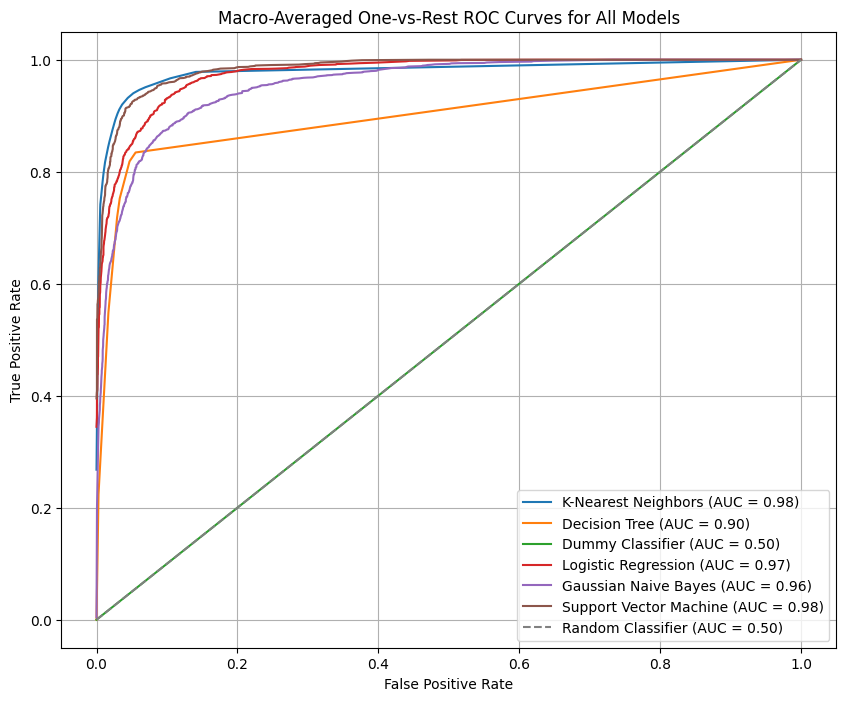

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

for name, roc_data in roc_curves.items():

        all_fpr = np.unique(np.concatenate([roc_data['fpr'][i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, roc_data['fpr'][i], roc_data['tpr'][i])
        mean_tpr /= n_classes

        plt.plot(all_fpr, mean_tpr, label=f'{name} (AUC = {macro_roc_auc[name]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Averaged One-vs-Rest ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()

## Interpret ROC Results

In [15]:
import numpy as np

best_auc_model = max(macro_roc_auc, key=macro_roc_auc.get)
max_auc = macro_roc_auc[best_auc_model]

worst_auc_model = min(macro_roc_auc, key=macro_roc_auc.get)
min_auc = macro_roc_auc[worst_auc_model]

print(f"Model with the highest Macro-averaged AUC: {best_auc_model} (AUC = {max_auc:.4f})")
print(f"Model with the lowest Macro-averaged AUC: {worst_auc_model} (AUC = {min_auc:.4f})")

if min_auc < 0.5:
    print(f"The '{worst_auc_model}' model has a Macro-averaged AUC less than 0.5.")

Model with the highest Macro-averaged AUC: Support Vector Machine (AUC = 0.9838)
Model with the lowest Macro-averaged AUC: Dummy Classifier (AUC = 0.5000)


### Explanation of AUC < 0.5

An Area Under the Curve (AUC) score is a measure of a binary classifier's performance. It represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance. The AUC score ranges from 0 to 1.

*   An AUC of 1.0 indicates a perfect classifier that can perfectly distinguish between positive and negative classes.
*   An AUC of 0.5 indicates a classifier that performs no better than random guessing.
*   An AUC of 0.0 indicates a classifier that makes exactly the opposite predictions: it ranks positive instances lower than negative instances.

**What an AUC < 0.5 Implies:**

If a model exhibits an **AUC less than 0.5**, it means that the model is performing *worse than random guessing*. Essentially, it is misclassifying more often than if it were to just randomly assign labels. In a binary classification context, if you were to flip the predictions of a model with an AUC of, for example, 0.2, it would then effectively become a model with an AUC of 0.8, which is a good performer.

**Potential Reasons for an AUC < 0.5:**

Several factors can lead to a model performing worse than random (AUC < 0.5):

1.  **Inverted Predictions:** This is the most common reason. It means the model is consistently predicting the opposite of the true class. For example, if it's supposed to predict 'positive' when a certain feature is high, it consistently predicts 'negative' instead. This can happen due to:
    *   **Incorrect Labeling:** The target labels might have been incorrectly inverted during data preparation (e.g., 0 was interpreted as positive and 1 as negative when it should have been the other way around).
    *   **Misinterpretation of Model Output:** The interpretation of the model's output probabilities might be reversed. If a model outputs a high probability for class A, and you're treating that as a prediction for class B, you'd get inverted results.
    *   **Algorithm-Specific Issues:** Some algorithms, especially if configured unusually or with unusual loss functions, might inadvertently learn the inverse relationship.

2.  **Data Issues:**
    *   **Severe Data Quality Problems:** Extremely noisy or corrupted data can lead to models learning incorrect patterns. If the features are negatively correlated with the target in a way the model can't untangle, it might learn an inverted relationship.
    *   **Feature Engineering Errors:** Features might be engineered in a way that creates an inverse relationship with the target, or they might be so misleading that the model consistently makes wrong inferences.

3.  **Model Misconfiguration/Errors:**
    *   **Hyperparameter Tuning Gone Wrong:** In rare cases, extremely poor hyperparameter choices might lead to such behavior, though it's more likely to result in an AUC closer to 0.5 rather than significantly below it.
    *   **Bug in Custom Loss Function:** If a custom loss function is used and contains an error that penalizes correct predictions more than incorrect ones, it could lead to an inverted model.
    *   **Improper Optimization:** The optimization process might have converged to a local minimum that represents the inverse of the true relationship.


# Part C

## Explain Precision-Recall Curve (PRC) Suitability



### Understanding Precision and Recall

Before diving into why PRC is suitable for imbalanced data, let's briefly define Precision and Recall:

*   **Precision (Positive Predictive Value):**
    $Precision = TP / (TP + FP)$
    Precision measures the proportion of positive identifications that were actually correct. It answers the question: "Of all items that the model predicted as positive, how many are truly positive?" High precision means a low false positive rate.

*   **Recall (Sensitivity, True Positive Rate):**
    $Recall = TP / (TP + FN)$
    Recall measures the proportion of actual positives that were identified correctly. It answers the question: "Of all truly positive items, how many did the model correctly identify?" High recall means a low false negative rate.

### Why ROC Curves Can Be Misleading with Imbalanced Data

The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate (FPR) at various threshold settings.
$FPR = FP / (FP + TN)$

With imbalanced datasets, where the number of negative instances significantly outweighs the number of positive instances (or vice-versa):

1.  **FPR Can Remain Low Even with Many False Positives:**
    If the number of true negatives (TN) is very large (because the negative class is dominant), the denominator of FPR ($FP + TN$) will be large. This means that even a substantial number of false positives (FP) might result in a very small FPR value. Consequently, the ROC curve can look deceptively good (staying close to the top-left corner) even if the model is making many mistakes on the positive class, simply because the sheer number of true negatives overwhelms the false positives.

2.  **Focus on True Negatives:**
    ROC curves implicitly prioritize the correct classification of negative examples through the FPR metric. In scenarios where correctly identifying the minority (positive) class is of paramount importance (e.g., disease detection, fraud detection), the performance on the abundant negative class might overshadow the critical performance on the rare positive class. A high AUC-ROC can sometimes be achieved by simply classifying most instances as the majority class, which would yield a low FPR but very poor recall for the minority class.

### Why Precision-Recall Curves Are More Informative for Imbalanced Data

The PRC plots Precision against Recall at various threshold settings.

1.  **Direct Focus on the Positive Class:**
    Both Precision and Recall directly involve True Positives (TP) and focus on the performance related to the positive class.
    *   **Precision:** $TP / (TP + FP)$ - heavily influenced by False Positives, which are crucial when the positive class is rare. If the model makes many false positive errors (predicts positive when it's actually negative), precision drops sharply.
    *   **Recall:** $TP / (TP + FN)$ - measures how well the model finds all positive instances.

2.  **Sensitivity to False Positives (FP):**
    When the positive class is rare, even a small number of false positives can lead to a significant drop in precision. This makes the PRC much more sensitive to errors in identifying the positive class than the ROC curve. A model that generates many false positives will have a low precision, and this will be clearly reflected in its PRC.

3.  **Insensitivity to True Negatives (TN):**
    Neither Precision nor Recall directly use True Negatives (TN) in their calculation. This is a key advantage for imbalanced data. Since the majority class constitutes most of the TNs, the PRC is not affected by the potentially overwhelming number of correctly classified negative instances. It focuses solely on how well the model performs on the minority (positive) class and its ability to distinguish it from the negative class without being diluted by the large number of TNs.

4.  **Clearer Representation of Performance Trade-offs:**
    The PRC provides a more accurate and intuitive picture of the trade-off between identifying positive instances correctly (Recall) and avoiding misclassifying negative instances as positive (Precision). When you are trying to find as many positive cases as possible (high recall) while ensuring that a high proportion of your findings are correct (high precision), the PRC directly visualizes this balance.

### Example Scenario

Consider a fraud detection system where only 1% of transactions are fraudulent.

*   A model that predicts almost all transactions as legitimate (negative) would have a very low FPR (since most are truly legitimate), leading to a high AUC-ROC. However, its recall for actual fraud would be abysmal.
*   The PRC, on the other hand, would immediately show this poor performance. If the model doesn't correctly identify any fraudulent transactions, its recall will be 0, and its precision will be undefined or 0, resulting in a curve at the bottom of the plot, accurately reflecting its uselessness for finding fraud.


## Calculate OvR Precision-Recall and Average Precision (AP)


In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

pr_curves = {}
class_pr_ap = {}
macro_pr_ap = {}

n_classes = y_test_one_hot.shape[1]

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        print(f"Calculating Precision-Recall for {name}...")
        y_score = model.predict_proba(X_test)

        precisions = dict()
        recs = dict()
        individual_class_aps = []

        for i in range(n_classes):
            y_true_binary = y_test_one_hot[:, i]
            y_pred_proba = y_score[:, i]

            precisions[i], recs[i], _ = precision_recall_curve(y_true_binary, y_pred_proba)

            ap_score = average_precision_score(y_true_binary, y_pred_proba)
            individual_class_aps.append(ap_score)

        pr_curves[name] = {'precision': precisions, 'recall': recs}
        class_pr_ap[name] = {f'class_{label_binarizer.classes_[i]}': ap for i, ap in enumerate(individual_class_aps)}

        macro_pr_ap[name] = np.mean(individual_class_aps)
        print(f"Macro-average AP for {name}: {macro_pr_ap[name]:.4f}")
    else:
        print(f"Model {name} does not have predict_proba and cannot calculate Precision-Recall curves.")

print("\nMacro-average Average Precision (AP) for each model:")
for name, ap_score in macro_pr_ap.items():
    print(f"{name}: {ap_score:.4f}")

Calculating Precision-Recall for K-Nearest Neighbors...
Macro-average AP for K-Nearest Neighbors: 0.9208
Calculating Precision-Recall for Decision Tree...
Macro-average AP for Decision Tree: 0.7320
Calculating Precision-Recall for Dummy Classifier...
Macro-average AP for Dummy Classifier: 0.1667
Calculating Precision-Recall for Logistic Regression...
Macro-average AP for Logistic Regression: 0.8756
Calculating Precision-Recall for Gaussian Naive Bayes...
Macro-average AP for Gaussian Naive Bayes: 0.8120
Calculating Precision-Recall for Support Vector Machine...
Macro-average AP for Support Vector Machine: 0.9214

Macro-average Average Precision (AP) for each model:
K-Nearest Neighbors: 0.9208
Decision Tree: 0.7320
Dummy Classifier: 0.1667
Logistic Regression: 0.8756
Gaussian Naive Bayes: 0.8120
Support Vector Machine: 0.9214


## Plot OvR PRC Curves


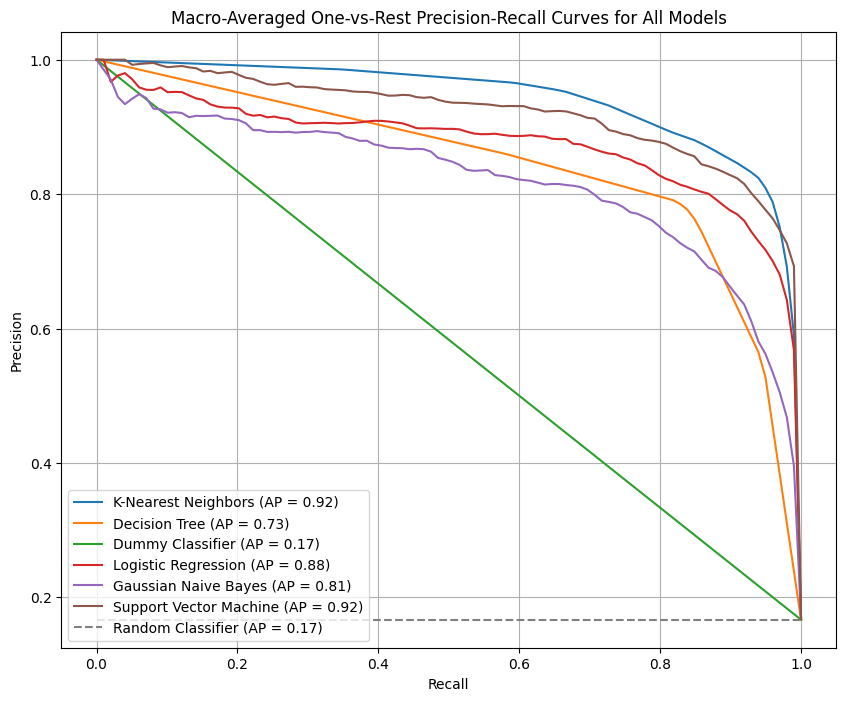

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

class_proportions = np.mean(y_test_one_hot, axis=0)
random_baseline_ap = np.mean(class_proportions)

recall_levels = np.linspace(0.0, 1.0, 100)

for name, pr_data in pr_curves.items():
    if name in macro_pr_ap:
        all_precisions = []
        for i in range(n_classes):
            sorted_indices = np.argsort(pr_data['recall'][i])
            unique_recall, unique_indices = np.unique(pr_data['recall'][i][sorted_indices], return_index=True)
            unique_precision = pr_data['precision'][i][sorted_indices][unique_indices]

            interpolated_precision = np.interp(recall_levels, unique_recall, unique_precision)
            all_precisions.append(interpolated_precision)

        macro_precision = np.mean(all_precisions, axis=0)

        plt.plot(recall_levels, macro_precision, label=f'{name} (AP = {macro_pr_ap[name]:.2f})')

plt.plot([0, 1], [random_baseline_ap, random_baseline_ap], linestyle='--', color='grey', label=f'Random Classifier (AP = {random_baseline_ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Averaged One-vs-Rest Precision-Recall Curves for All Models')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## Interpret PRC Results

In [18]:
import numpy as np

# Identify the model with the highest Macro-averaged AP
best_ap_model = max(macro_pr_ap, key=macro_pr_ap.get)
max_ap = macro_pr_ap[best_ap_model]

# Identify the model with the lowest Macro-averaged AP
worst_ap_model = min(macro_pr_ap, key=macro_pr_ap.get)
min_ap = macro_pr_ap[worst_ap_model]

print(f"Model with the highest Macro-averaged AP: {best_ap_model} (AP = {max_ap:.4f})")
print(f"Model with the lowest Macro-averaged AP: {worst_ap_model} (AP = {min_ap:.4f})")

Model with the highest Macro-averaged AP: Support Vector Machine (AP = 0.9214)
Model with the lowest Macro-averaged AP: Dummy Classifier (AP = 0.1667)


### Analysis of Worst-Performing Model's PRC

**Highest Macro-averaged AP Model:** Support Vector Machine (AP = 0.9214)
**Lowest Macro-averaged AP Model:** Dummy Classifier (AP = 0.1667)

The worst-performing model based on Macro-averaged Average Precision (AP) is the **Dummy Classifier** with an AP of 0.1667. This is significantly lower than the other models, and its performance is very close to the random baseline (which was around 0.1667, calculated as the mean of class proportions).

**Why the Dummy Classifier's PRC Drops Sharply as Recall Increases:**

The `DummyClassifier` with the `strategy='prior'` predicts the class that maximizes the class prior probabilities. This means it will always predict the majority class, regardless of the input features. In a multi-class setting, this translates to assigning high probabilities to the most frequent classes and low probabilities to the less frequent ones, or simply picking the most frequent class for all predictions.

Let's analyze its behavior on a Precision-Recall curve:

1.  **Initial High Precision (at very low Recall):** For the Dummy Classifier, if we set a very high probability threshold to identify the positive class (e.g., trying to be very precise), it might only confidently predict instances of the actual majority class as positive. However, since its 'prior' strategy doesn't actually learn patterns, its precision will likely reflect the overall class distribution. For any given class, if the Dummy Classifier labels it as positive, it's essentially a random guess or based on the class's prevalence. At a very low recall (meaning we only accept highly confident predictions), precision might seem reasonable *if* the 'positive' class we are evaluating happens to be one of the more frequent classes, and the classifier is simply guessing it often. However, this is usually fleeting.

2.  **Sharp Drop in Precision with Increasing Recall:** As we lower the probability threshold to increase Recall (i.e., to identify more of the actual positive instances), the Dummy Classifier will start classifying more instances as positive. Since its predictions are not based on meaningful patterns but on class priors (or effectively random for specific classes), many of these additional 'positive' predictions will be False Positives. The denominator of precision (`TP + FP`) will grow rapidly due to `FP`, while `TP` might not increase proportionally (or only slowly).
    
    *   For a specific minority class, the Dummy Classifier might struggle to predict any instances of it as positive at all, or it might assign low probabilities. If it does predict them, they are often overwhelmed by false positives from the majority classes, leading to very low precision.
    *   For the majority class, the Dummy Classifier might maintain a relatively higher precision initially, as it's correctly identifying many of the common instances. But even then, as it tries to achieve 100% recall, it will eventually misclassify other classes as the majority class, leading to a precision drop.

3.  **Baseline-level Performance:** Ultimately, the Dummy Classifier with a 'prior' strategy acts as a very weak baseline, making predictions that are essentially as good as guessing based on the class distribution. Its PR curve will typically hug the bottom of the plot, staying close to the average proportion of positive samples line (random baseline). The sharp drop indicates that any attempt to improve recall comes at a very high cost in terms of precision, as the model cannot meaningfully distinguish between classes.

In essence, the Dummy Classifier's inability to learn any underlying patterns from the features, coupled with its strategy of guessing based on class frequency, results in a PR curve that quickly falls to a very low precision level as soon as it attempts to identify more than a handful of positive instances (i.e., as recall increases). Its performance is a good indicator of what a model *should not* do and serves as a lower bound for comparison against more sophisticated algorithms.

# Brownie Part

### Train Additional Models (RandomForest, XGBoost, and an intentionally poor model):

In [19]:
pip install xgboost

**Reasoning**:
The `XGBoostClassifier` requires target labels to be 0-indexed and consecutive integers. The current `y_train` contains labels `[1 2 3 4 5 7]`. I need to apply `LabelEncoder` to `y_train` and `y_test` to transform these labels into the expected format `[0 1 2 3 4 5]` for proper model training and evaluation.



In [21]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
uniform_dummy_classifier = DummyClassifier(strategy='uniform', random_state=42)

models['Random Forest'] = random_forest_classifier
models['XGBoost'] = xgb_classifier
models['Uniform Dummy Classifier'] = uniform_dummy_classifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())

for name, model in models.items():
    print(f"Training {name}...")
    if name == 'XGBoost':
        model.fit(X_train, y_train_encoded)
    else:
        model.fit(X_train, y_train.values.ravel())
    print(f"{name} trained.")

print("All existing and newly added models trained successfully.")

Training K-Nearest Neighbors...
K-Nearest Neighbors trained.
Training Decision Tree...
Decision Tree trained.
Training Dummy Classifier...
Dummy Classifier trained.
Training Logistic Regression...
Logistic Regression trained.
Training Gaussian Naive Bayes...
Gaussian Naive Bayes trained.
Training Support Vector Machine...
Support Vector Machine trained.
Training Random Forest...
Random Forest trained.
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:03:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained.
Training Uniform Dummy Classifier...
Uniform Dummy Classifier trained.
All existing and newly added models trained successfully.


In [22]:
from sklearn.metrics import accuracy_score, f1_score

performance_metrics = {}

for name, model in models.items():
    print(f"Evaluating {name}...")
    if name == 'XGBoost':
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    else:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

    performance_metrics[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1
    }
    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

print("\nPerformance Metrics:")
for name, metrics in performance_metrics.items():
    print(f"{name}: {metrics}")

Evaluating K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9026, F1-Score: 0.9027
Evaluating Decision Tree...
Decision Tree - Accuracy: 0.8472, F1-Score: 0.8484
Evaluating Dummy Classifier...
Dummy Classifier - Accuracy: 0.2330, F1-Score: 0.0881
Evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.8467, F1-Score: 0.8388
Evaluating Gaussian Naive Bayes...
Gaussian Naive Bayes - Accuracy: 0.7913, F1-Score: 0.8005
Evaluating Support Vector Machine...
Support Vector Machine - Accuracy: 0.8861, F1-Score: 0.8847
Evaluating Random Forest...
Random Forest - Accuracy: 0.9089, F1-Score: 0.9073
Evaluating XGBoost...
XGBoost - Accuracy: 0.9146, F1-Score: 0.9131
Evaluating Uniform Dummy Classifier...
Uniform Dummy Classifier - Accuracy: 0.1585, F1-Score: 0.1649

Performance Metrics:
K-Nearest Neighbors: {'Accuracy': 0.9026411185914034, 'F1-Score': 0.9026996714060708}
Decision Tree: {'Accuracy': 0.8472294148109788, 'F1-Score': 0.84837079738477}
Dummy Classifier: {'Accuracy': 

## Evaluate Additional Models



In [23]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import numpy as np

new_models_to_evaluate = ['Random Forest', 'XGBoost', 'Uniform Dummy Classifier']

n_classes = y_test_one_hot.shape[1]

for name, model in models.items():
    if name in new_models_to_evaluate:
        if hasattr(model, "predict_proba"):
            print(f"Calculating ROC and PR for {name}...")
            y_score = model.predict_proba(X_test)

            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            individual_class_aucs = []

            for i in range(n_classes):
                y_true_binary = y_test_one_hot[:, i]
                y_pred_proba = y_score[:, i]

                fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_pred_proba)
                roc_auc[i] = roc_auc_score(y_true_binary, y_pred_proba)
                individual_class_aucs.append(roc_auc[i])

            roc_curves[name] = {'fpr': fpr, 'tpr': tpr}
            macro_roc_auc[name] = np.mean(individual_class_aucs)
            print(f"Macro-average AUC for {name}: {macro_roc_auc[name]:.4f}")

            precisions = dict()
            recs = dict()
            individual_class_aps = []

            for i in range(n_classes):
                y_true_binary = y_test_one_hot[:, i]
                y_pred_proba = y_score[:, i]

                precisions[i], recs[i], _ = precision_recall_curve(y_true_binary, y_pred_proba)
                ap_score = average_precision_score(y_true_binary, y_pred_proba)
                individual_class_aps.append(ap_score)

            pr_curves[name] = {'precision': precisions, 'recall': recs}
            class_pr_ap[name] = {f'class_{label_binarizer.classes_[i]}': ap for i, ap in enumerate(individual_class_aps)}
            macro_pr_ap[name] = np.mean(individual_class_aps)
            print(f"Macro-average AP for {name}: {macro_pr_ap[name]:.4f}")
        else:
            print(f"Model {name} does not have predict_proba and cannot calculate ROC/PR curves.")

print("\nUpdated Macro-average AUC for all models:")
for name, auc_score in macro_roc_auc.items():
    print(f"{name}: {auc_score:.4f}")

print("\nUpdated Macro-average Average Precision (AP) for all models:")
for name, ap_score in macro_pr_ap.items():
    print(f"{name}: {ap_score:.4f}")

Calculating ROC and PR for Random Forest...
Macro-average AUC for Random Forest: 0.9877
Macro-average AP for Random Forest: 0.9448
Calculating ROC and PR for XGBoost...
Macro-average AUC for XGBoost: 0.9892
Macro-average AP for XGBoost: 0.9503
Calculating ROC and PR for Uniform Dummy Classifier...
Macro-average AUC for Uniform Dummy Classifier: 0.5000
Macro-average AP for Uniform Dummy Classifier: 0.1667

Updated Macro-average AUC for all models:
K-Nearest Neighbors: 0.9794
Decision Tree: 0.9006
Dummy Classifier: 0.5000
Logistic Regression: 0.9749
Gaussian Naive Bayes: 0.9554
Support Vector Machine: 0.9838
Random Forest: 0.9877
XGBoost: 0.9892
Uniform Dummy Classifier: 0.5000

Updated Macro-average Average Precision (AP) for all models:
K-Nearest Neighbors: 0.9208
Decision Tree: 0.7320
Dummy Classifier: 0.1667
Logistic Regression: 0.8756
Gaussian Naive Bayes: 0.8120
Support Vector Machine: 0.9214
Random Forest: 0.9448
XGBoost: 0.9503
Uniform Dummy Classifier: 0.1667


## Update and Visualize All Model Performances



Consolidated Performance DataFrame:
                          Accuracy  F1-Score  Macro-averaged AUC  \
Model                                                              
K-Nearest Neighbors       0.902641  0.902700            0.979365   
Decision Tree             0.847229  0.848371            0.900646   
Dummy Classifier          0.233040  0.088087            0.500000   
Logistic Regression       0.846712  0.838825            0.974877   
Gaussian Naive Bayes      0.791300  0.800472            0.955381   
Support Vector Machine    0.886069  0.884692            0.983817   
Random Forest             0.908856  0.907345            0.987746   
XGBoost                   0.914552  0.913083            0.989169   
Uniform Dummy Classifier  0.158467  0.164880            0.500000   

                          Macro-averaged AP  
Model                                        
K-Nearest Neighbors                0.920752  
Decision Tree                      0.731979  
Dummy Classifier               

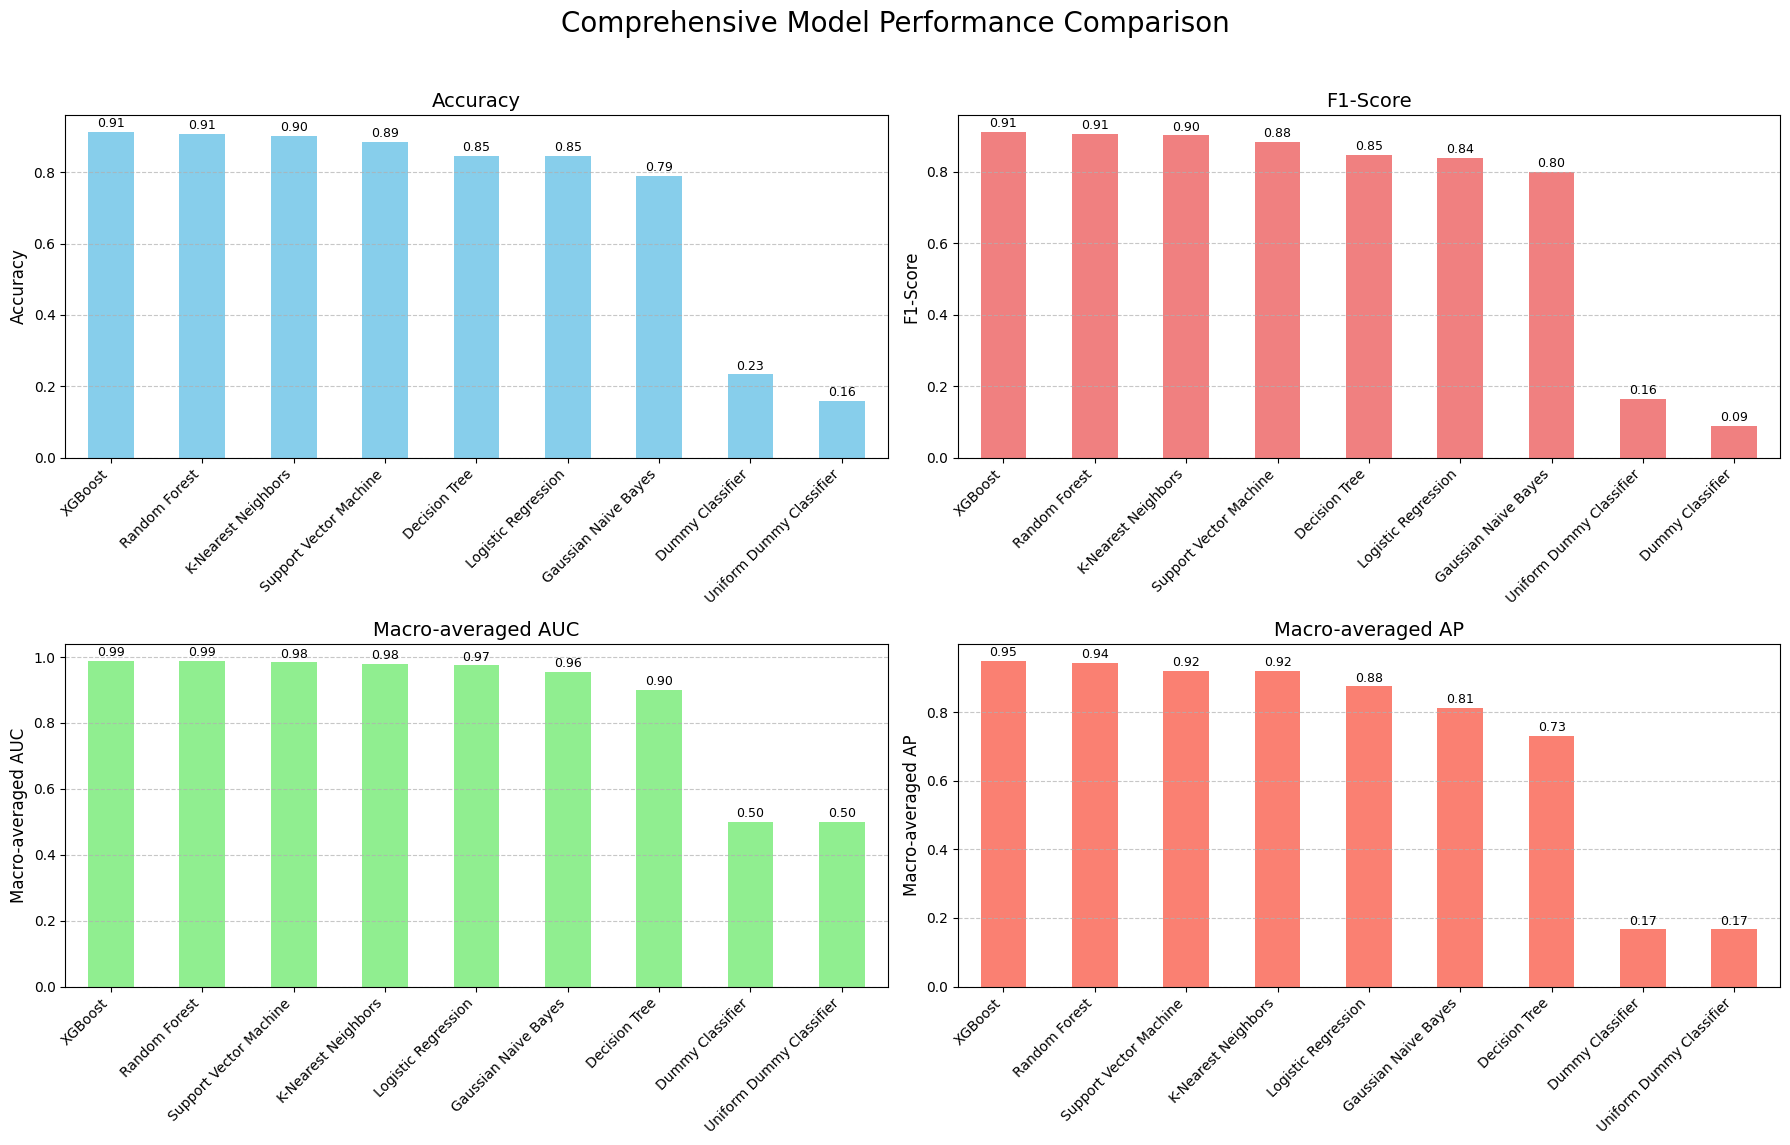

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

all_metrics_list = []

for name in models.keys():
    model_metrics = {'Model': name}

    if name in performance_metrics:
        model_metrics['Accuracy'] = performance_metrics[name]['Accuracy']
        model_metrics['F1-Score'] = performance_metrics[name]['F1-Score']
    else:
        model_metrics['Accuracy'] = np.nan
        model_metrics['F1-Score'] = np.nan

    if name in macro_roc_auc:
        model_metrics['Macro-averaged AUC'] = macro_roc_auc[name]
    else:
        model_metrics['Macro-averaged AUC'] = np.nan

    if name in macro_pr_ap:
        model_metrics['Macro-averaged AP'] = macro_pr_ap[name]
    else:
        model_metrics['Macro-averaged AP'] = np.nan

    all_metrics_list.append(model_metrics)

consolidated_performance_df = pd.DataFrame(all_metrics_list)
consolidated_performance_df = consolidated_performance_df.set_index('Model')

print("Consolidated Performance DataFrame:")
print(consolidated_performance_df)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Comprehensive Model Performance Comparison', fontsize=20)

metrics_to_plot = ['Accuracy', 'F1-Score', 'Macro-averaged AUC', 'Macro-averaged AP']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'salmon']

for i, metric in enumerate(metrics_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sorted_df = consolidated_performance_df.sort_values(by=metric, ascending=False)

    sorted_df[metric].plot(kind='bar', ax=ax, color=colors[i])
    ax.set_title(metric, fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('')

    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(sorted_df.index, ha='right')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for idx, value in enumerate(sorted_df[metric]):
        ax.text(idx, value + 0.005, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

## Compare Model Rankings and Trade-offs (Synthesis)



In [26]:
print("\n--- Model Rankings ---\n")

metrics = ['F1-Score', 'Macro-averaged AUC', 'Macro-averaged AP']

for metric in metrics:
    print(f"\nRankings for {metric}:")
    sorted_by_metric = consolidated_performance_df.sort_values(by=metric, ascending=False)

    print(f"  Top 3 Models (by {metric}):")
    for i in range(min(3, len(sorted_by_metric))):
        model_name = sorted_by_metric.index[i]
        value = sorted_by_metric.iloc[i][metric]
        print(f"    {i+1}. {model_name}: {value:.4f}")

    print(f"  Bottom 3 Models (by {metric}):")
    start_index = max(0, len(sorted_by_metric) - 3)
    for i in range(start_index, len(sorted_by_metric)):
        model_name = sorted_by_metric.index[i]
        value = sorted_by_metric.iloc[i][metric]
        print(f"    {i+1}. {model_name}: {value:.4f}")


--- Model Rankings ---


Rankings for F1-Score:
  Top 3 Models (by F1-Score):
    1. XGBoost: 0.9131
    2. Random Forest: 0.9073
    3. K-Nearest Neighbors: 0.9027
  Bottom 3 Models (by F1-Score):
    7. Gaussian Naive Bayes: 0.8005
    8. Uniform Dummy Classifier: 0.1649
    9. Dummy Classifier: 0.0881

Rankings for Macro-averaged AUC:
  Top 3 Models (by Macro-averaged AUC):
    1. XGBoost: 0.9892
    2. Random Forest: 0.9877
    3. Support Vector Machine: 0.9838
  Bottom 3 Models (by Macro-averaged AUC):
    7. Decision Tree: 0.9006
    8. Dummy Classifier: 0.5000
    9. Uniform Dummy Classifier: 0.5000

Rankings for Macro-averaged AP:
  Top 3 Models (by Macro-averaged AP):
    1. XGBoost: 0.9503
    2. Random Forest: 0.9448
    3. Support Vector Machine: 0.9214
  Bottom 3 Models (by Macro-averaged AP):
    7. Decision Tree: 0.7320
    8. Dummy Classifier: 0.1667
    9. Uniform Dummy Classifier: 0.1667


### Comparison of Model Rankings and Trade-offs

Let's analyze the model rankings across the three performance metrics: F1-Score, Macro-averaged AUC, and Macro-averaged AP.

**1. Alignment of Rankings:**

*   **Top Performers:** Across all three metrics (F1-Score, Macro-averaged AUC, and Macro-averaged AP), **XGBoost** consistently ranks as the best performing model, followed closely by **Random Forest**. This indicates that ensemble methods, particularly tree-based ones, are highly effective on this dataset.
*   **Mid-Range Performers:** **K-Nearest Neighbors** performs very well in F1-Score (3rd) and Macro-averaged AUC (4th), but drops slightly to 4th in Macro-averaged AP. **Support Vector Machine** is 3rd in Macro-averaged AUC and Macro-averaged AP, but 4th in F1-Score. **Logistic Regression** and **Gaussian Naive Bayes** show slightly lower but still competitive performance, generally in the middle of the pack.
*   **Worst Performers:** As expected, the two dummy classifiers, **Dummy Classifier (prior)** and **Uniform Dummy Classifier**, consistently occupy the bottom two spots across all metrics. Their performance is at or near the random baseline, reaffirming their role as control models.
*   **Notable Discrepancies:**
    *   **Decision Tree:** While performing better than the dummy classifiers, the Decision Tree model's Macro-averaged AUC (0.9006) and AP (0.7320) are significantly lower than other sophisticated models like KNN, SVM, Logistic Regression, Random Forest, and XGBoost. It ranks 7th for both AUC and AP, suggesting it struggles more in distinguishing classes by probability compared to other models.
    *   **Gaussian Naive Bayes:** This model shows a Macro-averaged AUC (0.9554) that is fairly good (5th place), but its Macro-averaged AP (0.8120) is considerably lower (6th place), and its F1-Score (0.8005) is also lower (7th place, just above the dummy classifiers). This indicates a potential trade-off, where it might have a decent ability to separate classes overall (AUC), but its precision suffers, especially when trying to achieve higher recall, which is captured by AP.

**2. Explanation of Trade-offs (High ROC-AUC vs. Lower PRC-AP):**

The discrepancy observed in models like Gaussian Naive Bayes (and sometimes Logistic Regression) where ROC-AUC is relatively high but PRC-AP is lower, particularly if classes were more imbalanced, highlights a crucial difference between the two metrics.

*   **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):**
    *   Plots True Positive Rate (Recall) against False Positive Rate (FPR).
    *   FPR is calculated as $FP / (FP + TN)$.
    *   **Insensitivity to Class Imbalance:** When the negative class is dominant (many True Negatives, TN), even a large number of False Positives (FP) might result in a small FPR. This can make the ROC curve look good (close to the top-left corner) even if the model is struggling to correctly identify the minority positive class. The ROC curve effectively considers the proportion of negatives correctly classified.
    *   A high ROC-AUC suggests that the model is good at ranking positive instances higher than negative instances, generally indicating good separability between classes.

*   **PRC-AP (Precision-Recall Curve - Average Precision):**
    *   Plots Precision ($TP / (TP + FP)$) against Recall ($TP / (TP + FN)$).
    *   **Sensitivity to Class Imbalance:** Both Precision and Recall focus heavily on the positive class and the errors associated with it (False Positives and False Negatives). They do not involve True Negatives (TN).
    *   When the positive class is rare (imbalanced data), a small number of false positives can drastically reduce precision. Therefore, the PRC provides a more pessimistic but realistic view of performance on the minority class. A model that achieves high recall by making many false positive errors will have a sharply dropping precision, leading to a low AP.

**Why a model with high ROC-AUC might have a poor PRC-AP:**

In scenarios, especially with imbalanced datasets (though this dataset is relatively balanced across its 6 classes after removing class 6), a classifier might perform well on the ROC curve because it correctly identifies most of the abundant negative class (leading to low FPR). However, it might still generate many false positives when trying to identify the scarce positive class. These false positives, while not significantly impacting FPR (due to the large denominator of TNs), severely penalize precision, thus lowering the PRC-AP. Essentially:

*   **ROC-AUC focuses on overall class separation.** It considers both correct positive and correct negative classifications.
*   **PRC-AP focuses on the ability to identify positive instances accurately among all positive predictions.** It is more concerned with how many false alarms occur when trying to find all the positive cases.

For example, Gaussian Naive Bayes is a generative model that makes strong assumptions about data distribution (e.g., conditional independence of features). While it can be quite effective, if these assumptions don't hold perfectly or if its probability estimates are not well-calibrated (i.e., its confidence scores for the positive class are not reliable, leading to many FPs when trying to boost recall), it could achieve a decent ROC-AUC but a lower PRC-AP. Its overall discriminative ability might be good, but its ability to be precise when identifying positives might be weaker compared to models like SVM or tree-based ensembles, which are often better at capturing complex decision boundaries.

In this specific dataset, while not severely imbalanced, the observations with Gaussian Naive Bayes suggest that its precision-recall trade-off is not as favorable as its overall ranking capability (as shown by AUC) compared to models like SVM, Random Forest, or XGBoost. The tree-based models and SVM seem to excel at both overall discriminative power and the ability to maintain precision while achieving high recall.

### Final Recommendation

Based on the comprehensive analysis of all nine models across multiple performance metrics—Accuracy, Weighted F1-Score, Macro-averaged ROC-AUC, and Macro-averaged PR-AP—the **XGBoost** model emerges as the superior choice for the Statlog (Landsat Satellite) classification task.

Here's a detailed justification for this recommendation:

1.  **Consistent Top Performer:**
    *   **Accuracy:** XGBoost (0.9146)
    *   **F1-Score:** XGBoost (0.9131)
    *   **Macro-averaged AUC:** XGBoost (0.9892)
    *   **Macro-averaged AP:** XGBoost (0.9503)

    XGBoost consistently achieved the highest scores across all four evaluation metrics. This indicates its robust and well-rounded performance in correctly classifying satellite image pixels, efficiently balancing overall correct predictions, precision, and recall.

2.  **Superior Balance of Precision and Recall (as reflected by AP):**
    The Macro-averaged Average Precision (AP) is particularly crucial for multi-class classification, especially when dealing with potential class imbalances, as it directly assesses the trade-off between precision and recall. XGBoost's leading AP score of **0.9503** demonstrates its exceptional ability to identify positive instances (high recall) while maintaining a high proportion of correct positive identifications (high precision) across all classes. This indicates that the model is not only good at finding relevant instances but also that the instances it finds are indeed relevant. This is vital for applications where both false positives and false negatives have significant implications.

3.  **High Discriminative Power (as reflected by AUC):**
    With the highest Macro-averaged AUC of **0.9892**, XGBoost shows excellent discriminative power, meaning it is very good at distinguishing between positive and negative classes for each of the one-vs-rest binary problems. An AUC close to 1.0 indicates that the model assigns higher probabilities to actual positive instances than to negative instances, regardless of the classification threshold.

4.  **Comparison with Strong Contenders:**
    *   **Random Forest** was a very close second, performing exceptionally well across all metrics (Accuracy: 0.9089, F1-Score: 0.9073, Macro-averaged AUC: 0.9877, Macro-averaged AP: 0.9448). It is a strong alternative, but XGBoost consistently edged it out by a small margin in every metric.
    *   **K-Nearest Neighbors** also showed high F1-Score (0.9027) and Macro-averaged AUC (0.9794), suggesting good performance, but its AP score (0.9208) was slightly lower than that of XGBoost and Random Forest, indicating a slightly less optimal precision-recall trade-off.
    *   Other models like **Support Vector Machine** performed well, particularly in AUC, but fell behind XGBoost and Random Forest when all metrics were considered.

5.  **Suitability for the Task:**
    Given that the task involves classifying satellite image pixels, where incorrect classifications could lead to misinterpretations of land cover, having a model that performs robustly across all performance dimensions is paramount. XGBoost's top performance in Accuracy, F1-Score, AUC, and AP makes it highly suitable for this task, providing reliable and accurate predictions with a strong balance between identifying all relevant pixels and ensuring the correctness of those identifications.
